In [28]:
import csv
from numpy import *
import matplotlib.pyplot as plt

In [7]:
f = open('RateMyProfessor_Sample data.csv','r')
csvreader = csv.reader(f)
final_list = list(csvreader)

In [8]:
final_list[0]

['professor_name',
 'school_name',
 'department_name',
 'local_name',
 'state_name',
 'year_since_first_review',
 'star_rating',
 'take_again',
 'diff_index',
 'tag_professor',
 'num_student',
 'post_date',
 'name_onlines',
 'name_not_onlines',
 'student_star',
 'student_difficult',
 'attence',
 'for_credits',
 'would_take_agains',
 'grades',
 'help_useful',
 'help_not_useful',
 'comments',
 'word_comment',
 'gender',
 'race',
 'asian',
 'hispanic',
 'nh_black',
 'nh_white',
 'gives_good_feedback',
 'caring',
 'respected',
 'participation_matters',
 'clear_grading_criteria',
 'skip_class',
 'amazing_lectures',
 'inspirational',
 'tough_grader',
 'hilarious',
 'get_ready_to_read',
 'lots_of_homework',
 'accessible_outside_class',
 'lecture_heavy',
 'extra_credit',
 'graded_by_few_things',
 'group_projects',
 'test_heavy',
 'so_many_papers',
 'beware_of_pop_quizzes',
 'IsCourseOnline']

In [22]:
res_dict = {}
for i in range(len(final_list)):
    if i == 0:
        continue
    if final_list[i][2] not in res_dict:
        res_dict[final_list[i][2]] = [float(final_list[i][6])]
    else:
        res_dict[final_list[i][2]].append(float(final_list[i][6]))

In [23]:
new_res_dict = {}
for i in res_dict:
    if len(res_dict[i]) >= 100:
        new_res_dict[i] = mean(res_dict[i])

In [25]:
res_list = []
for i in new_res_dict:
    res_list.append(new_res_dict[i])
res_list.sort()
res_list

[3.0741071428571436,
 3.137209302325582,
 3.2900611620795104,
 3.3047619047619063,
 3.3627249357326474,
 3.4122093023255813,
 3.4199999999999986,
 3.4357876712328763,
 3.456038374717833,
 3.4749999999999996,
 3.5256410256410264,
 3.5511363636363638,
 3.5617449664429524,
 3.5676409185803757,
 3.5973753280839893,
 3.6110687022900763,
 3.6197247706422013,
 3.629807692307691,
 3.634313725490196,
 3.644821731748727,
 3.6475881261595546,
 3.6509004739336492,
 3.655098389982111,
 3.6969656992084428,
 3.703964098728497,
 3.7758620689655173,
 3.8158490566037737,
 3.832530120481928,
 3.84688221709007,
 3.8529230769230765,
 3.858394160583941,
 3.8987421383647796,
 3.9345971563981035,
 3.9541353383458655,
 4.068484848484848,
 4.129126213592233,
 4.148214285714286,
 4.150455927051673,
 4.1848314606741575]

In [31]:
best_department = {}
worst_department = {}
for i in range(5):
    temp = [k for k,v in new_res_dict.items() if v == res_list[i]]
    worst_department[temp[0][:-11]] = res_list[i]
    
for i in range(1,6):
    temp = [k for k,v in new_res_dict.items() if v == res_list[-i]]
    best_department[temp[0][:-11]] = res_list[-i]
print(worst_department)
print(best_department)

{'Nursing': 3.0741071428571436, 'Physics': 3.137209302325582, 'Computer Science': 3.2900611620795104, 'Management': 3.3047619047619063, 'Economics': 3.3627249357326474}
{'Physical Ed': 4.1848314606741575, 'Music': 4.150455927051673, 'Film': 4.148214285714286, 'Literature': 4.129126213592233, 'Theology': 4.068484848484848}


Text(0, 0.5, 'star rating')

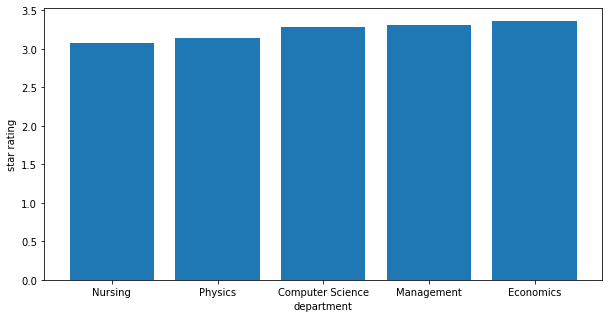

In [36]:
fig = plt.figure(figsize=(10,5))
x1 = list(worst_department.keys())
y1 = list(worst_department.values())
x2 = list(best_department.keys())
y2 = list(best_department.values())
plt.bar(x1,y1)
plt.xlabel("department")
plt.ylabel("star rating")

Text(0, 0.5, 'star rating')

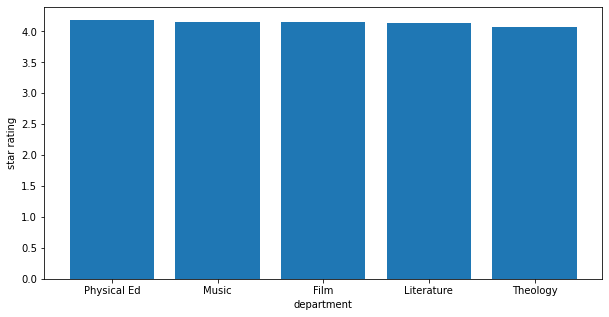

In [38]:
fig = plt.figure(figsize=(10,5))
plt.bar(x2,y2)
plt.xlabel('department')
plt.ylabel("star rating")